<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Ogembo-View" data-toc-modified-id="Ogembo-View-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ogembo View</a></span><ul class="toc-item"><li><span><a href="#Ogemba-Last-90-Days-as-at-undefined" data-toc-modified-id="Ogemba-Last-90-Days-as-at-undefined-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Ogemba Last 90 Days as at undefined</a></span><ul class="toc-item"><li><span><a href="#Summary-Stats" data-toc-modified-id="Summary-Stats-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Summary Stats</a></span></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Correlations</a></span></li><li><span><a href="#t-test-Group-Means" data-toc-modified-id="t-test-Group-Means-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>t-test Group Means</a></span></li></ul></li></ul></li><li><span><a href="#All-KE-2015---2017" data-toc-modified-id="All-KE-2015---2017-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>All KE 2015 - 2017</a></span><ul class="toc-item"><li><span><a href="#Ogembo-2015---2017" data-toc-modified-id="Ogembo-2015---2017-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Ogembo 2015 - 2017</a></span></li><li><span><a href="#Summarizing" data-toc-modified-id="Summarizing-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Summarizing</a></span></li><li><span><a href="#Summaries-KE-2015---2017" data-toc-modified-id="Summaries-KE-2015---2017-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Summaries KE 2015 - 2017</a></span></li></ul></li><li><span><a href="#Ogembo-2015---2017" data-toc-modified-id="Ogembo-2015---2017-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Ogembo 2015 - 2017</a></span></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Appendix</a></span><ul class="toc-item"><li><span><a href="#Summary-Stats-for-Ogembo" data-toc-modified-id="Summary-Stats-for-Ogembo-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Summary Stats for Ogembo</a></span><ul class="toc-item"><li><span><a href="#By-HH-Quintiles" data-toc-modified-id="By-HH-Quintiles-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>By HH Quintiles</a></span><ul class="toc-item"><li><span><a href="#HH" data-toc-modified-id="HH-5.1.1.1"><span class="toc-item-num">5.1.1.1&nbsp;&nbsp;</span>HH</a></span></li></ul></li></ul></li></ul></li></ul></div>

In [3]:
%run "../../utilz/load_envz.ipynb"
%run "../../utilz/LG_load_envz.ipynb"

The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic


ERROR:root:Cell magic `%%R` not found.


In [2]:
## Load Dataset - Ogembo Last 90 Days Dashboard
og_dt = pd.read_csv( "%s/LG/Ogembo_targeted_chv_support_ke-20180326.csv" % DATA_DIR)
og_dt.drop("Phone Number", axis=1, inplace=True)

LAST_DATED = "26-Mar-2018"



In [15]:

## Load Dataset - KE 2015 - 2017
ke_dt = pd.read_csv( "%s/LG/Branch Data 2015-2017.csv" % DATA_DIR)





 Getting a feel of distribution based on Households Registered


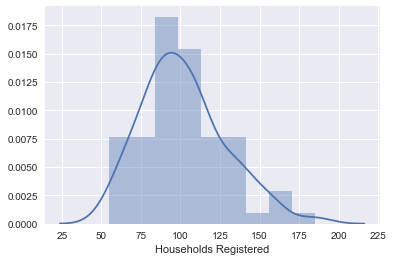

In [4]:
print("\n\n Getting a feel of distribution based on Households Registered")
og_dt.drop( og_dt[ (og_dt["Households Registered"] < 20) | (og_dt["Households Registered"] >250) ].index, inplace=True)
sns.distplot( og_dt["Households Registered"] )


In [5]:
## Calaculated fields
og_dt["Country"] = "KE"
og_dt["Hits_Sales_Target"]= np.where( og_dt["Sales"] < SALES_TARGET, 0, 1)
quintilize(og_dt, "Households Registered")

og_dt["Total Assessments"] = og_dt["Total U1 Assessments"] + og_dt["Total U5 Assessments"] 
og_dt["Total Treatments"] = og_dt["Total U1 Treatments"] + og_dt["Total U5 Treatments"] 
og_dt["Total Referrals"] = og_dt["On Time Referral f/u Treatment U5"] 

og_dt["Pct_Treated in Assessed"] = np.nan_to_num( og_dt["Total Treatments"]/og_dt["Total Assessments"] )
og_dt["Pct_Referral in Assessed"] = og_dt["Total Referrals"]/og_dt["Total Assessments"]
og_dt["Pct_Malaria in Assessed"] = og_dt["All Malaria Assessments"]/og_dt["Total Assessments"]

og_dt["Pct_Malaria in Treated"] = og_dt["All Malaria Treatments"]/og_dt["Total Treatments"]
og_dt["Pct_U1 in Assessed"] = og_dt["Total U1 Assessments"]/og_dt["Total Assessments"]
og_dt["Pct_U1 in Treated"] = og_dt["Total U1 Treatments"]/og_dt["Total Treatments"]


## Variables
argz_n = ["CHP ID"]

argz_EPM = ["Sales", "Community Events", "Pregnancy","Total Assessments", "Total Referrals", "All Malaria Assessments"]

argz_malaria = ["All Malaria Assessments", "All Malaria Treatments", "U5 Malaria", "Act 6pack Issue", "mRDT Used"]
argz_cases = ["U5 Malaria", "U5 Pneumonia", "U5 Diarrhea"]
argz_axns = ["Total Assessments", "Total Treatments", "Total Referrals", "All Malaria Assessments", "All Malaria Treatments"]
argz_pct = ["Pct_Treated in Assessed", "Pct_Referral in Assessed", "Pct_Malaria in Assessed"] 
argz_referral = ["Total Referrals"]
argz_pregoz = ["Pregnancy"]

argz_u1_u5 = ["Total U1 Assessments", "Total U1 Treatments","Total U5 Assessments", "Total U5 Treatments"]


# Introduction

**What are we looking into?**
- An indication of potential sample size 
    - Reach:- Number of Study Units: CHWs, HHs, CUs reached
    - Transactions:- Number Transction Records: for a particular output e.g. referrals
        - Sums or totals
        - Average per CHW

# Ogembo View

## Ogemba Last 90 Days as at {{LAST_DATED}}

### Summary Stats
** Sample Size Indication **
- Reach: CHWs, Households
- Transactions: Referrals, 



 Summarizing Key Variables 


,Sales,Community Events,Pregnancy,Total Assessments,Total Referrals,All Malaria Assessments
# Cases or Sum,525323.29,448.00,243.00,4642.00,48.30,928.00
Avg. per CHW,7296.16,6.22,3.38,64.47,0.67,12.89
Max per CHW,59812.62,29.00,10.00,170.00,1.00,76.00
Min per CHW,-1040.00,0.00,0.00,0.00,0.00,0.00




 Summarizing Key Variables 


,U5 Malaria,U5 Pneumonia,U5 Diarrhea,Total U1 Assessments,Total U1 Treatments,Total U5 Assessments,Total U5 Treatments,Total Referrals
# Cases or Sum,418.00,398.00,432.0,891.00,228.00,3751.0,1248.00,48.30
Avg. per CHW,5.81,5.53,6.0,12.38,3.17,52.1,17.33,0.67
Max per CHW,51.00,32.00,30.0,33.00,15.00,137.0,77.00,1.00
Min per CHW,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00


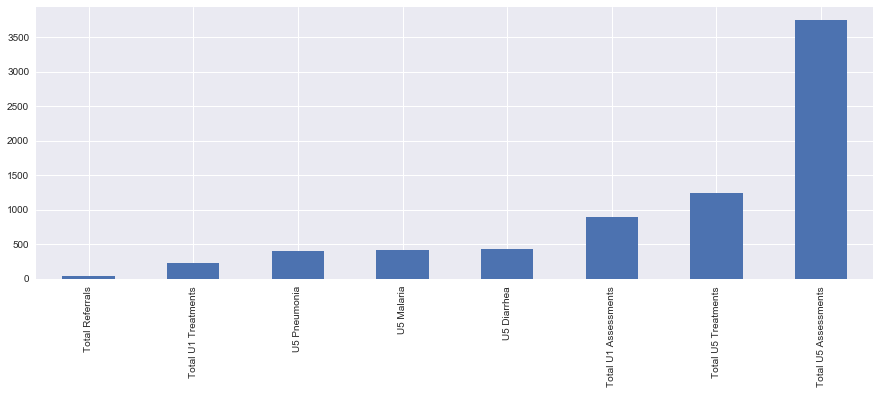

In [6]:
## Summarize 
CHWSummaries( og_dt, argz_EPM , "Summarizing Key Variables ", plotit=False) 
d,g = CHWSummaries( og_dt, argz_cases+argz_u1_u5+argz_referral, "Summarizing Key Variables ", plotit=True) 
d
g

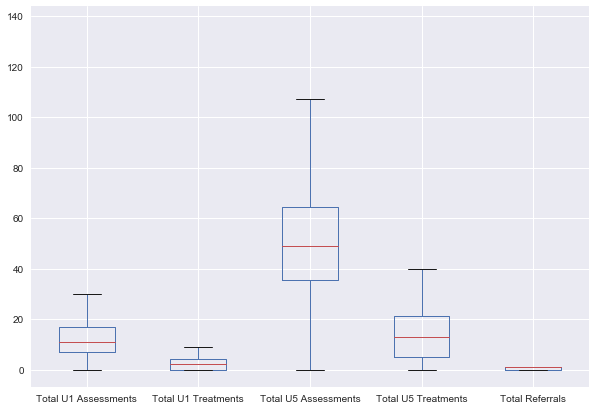

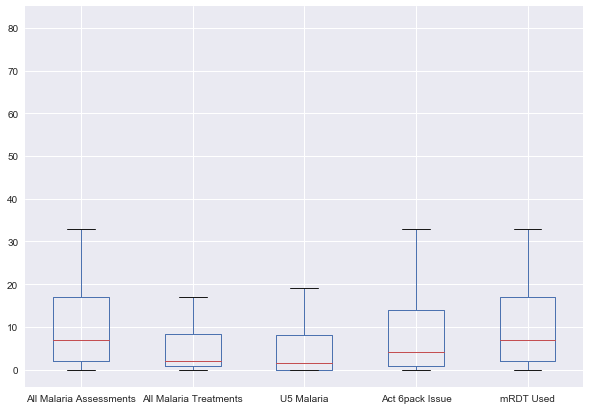

In [7]:
plotBoxz( og_dt, argz_u1_u5+argz_referral)
plotBoxz( og_dt, argz_malaria)

### Correlations
- Key indicators
- Within Malaria
- Amongst cases/diseases
- Relative to Sales target of KES {{SALES_TARGET}}



1. Correlations - Within KPIs


,Sales,Community Events,Pregnancy,Total Assessments,Total Referrals,All Malaria Assessments
Sales,1.000,0.792,0.314,0.229,0.282,-0.025
Community Events,0.792,1.000,0.245,0.385,0.258,-0.001
Pregnancy,0.314,0.245,1.000,0.364,0.403,0.275
Total Assessments,0.229,0.385,0.364,1.000,0.374,0.363
Total Referrals,0.282,0.258,0.403,0.374,1.000,0.149
All Malaria Assessments,-0.025,-0.001,0.275,0.363,0.149,1.000


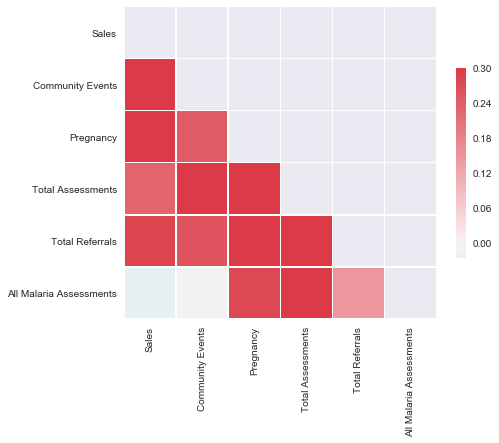

In [8]:
print("\n\n1. Correlations - Within KPIs")
t,g = plotCorrz( corrz( og_dt, argz_EPM) )
t




2. Correlations - Within Malaria


,All Malaria Assessments,All Malaria Treatments,U5 Malaria,Act 6pack Issue,mRDT Used
All Malaria Assessments,1.000,0.861,0.863,0.812,1.000
All Malaria Treatments,0.861,1.000,0.958,0.938,0.861
U5 Malaria,0.863,0.958,1.000,0.857,0.863
Act 6pack Issue,0.812,0.938,0.857,1.000,0.812
mRDT Used,1.000,0.861,0.863,0.812,1.000


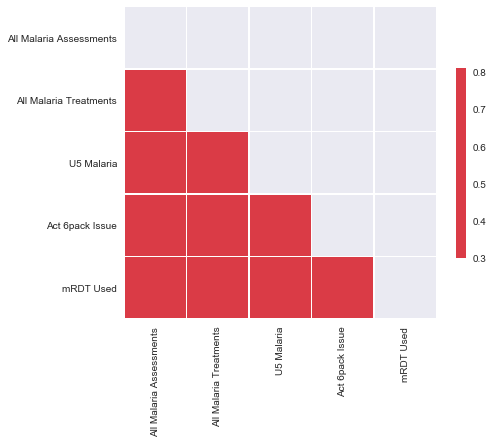

In [9]:
print("\n\n2. Correlations - Within Malaria")
t,g = plotCorrz( corrz( og_dt, argz_malaria) )
t




2. Correlations - Amongst Diseases/Cases


,U5 Malaria,U5 Pneumonia,U5 Diarrhea,Total Referrals,Pregnancy
U5 Malaria,1.000,0.258,0.260,0.178,0.214
U5 Pneumonia,0.258,1.000,0.361,0.290,0.233
U5 Diarrhea,0.260,0.361,1.000,0.238,0.362
Total Referrals,0.178,0.290,0.238,1.000,0.403
Pregnancy,0.214,0.233,0.362,0.403,1.000


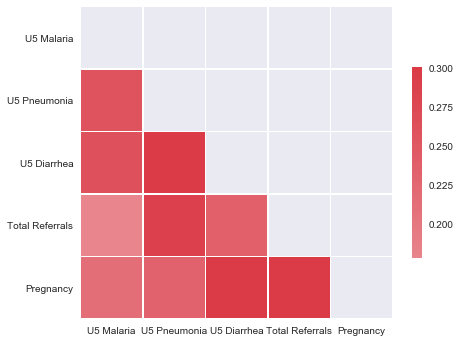

In [10]:
print("\n\n2. Correlations - Amongst Diseases/Cases")
t,g = plotCorrz( corrz( og_dt, argz_cases+argz_referral+argz_pregoz) )
t




3.a. Correlations - Relative to Sales Targets - 1).Misses Target


,Sales,Community Events,Pregnancy,Total Assessments,Total Referrals,All Malaria Assessments
Sales,1.000,0.396,0.293,0.266,0.677,0.130
Community Events,0.396,1.000,0.488,0.385,0.460,0.209
Pregnancy,0.293,0.488,1.000,0.663,0.508,0.273
Total Assessments,0.266,0.385,0.663,1.000,0.347,0.558
Total Referrals,0.677,0.460,0.508,0.347,1.000,0.019
All Malaria Assessments,0.130,0.209,0.273,0.558,0.019,1.000


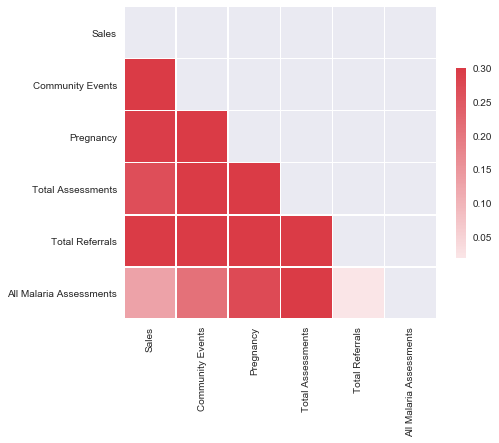

In [11]:
print("\n\n3.a. Correlations - Relative to Sales Targets - 1).Misses Target")
t,g = plotCorrz( corrz( og_dt[og_dt["Hits_Sales_Target"]==0], argz_EPM) )
t




3.b. Correlations - Relative to Sales Targets - 2).Hits Target


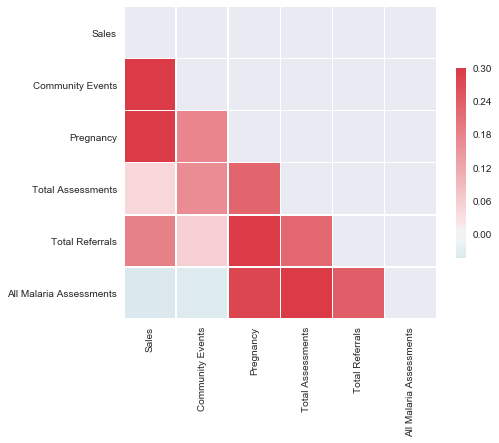

In [12]:
print("\n\n3.b. Correlations - Relative to Sales Targets - 2).Hits Target")
t,g = plotCorrz( corrz( og_dt[og_dt["Hits_Sales_Target"]==1], argz_EPM) )


### t-test Group Means
- Sales groups 
- HH registered quintiles


# All KE 2015 - 2017

- unit of study is branch TODO: get at CHW level granularity

In [16]:
ke_dt.info()
#ke_dt.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 90 columns):
branch_uuid                                      504 non-null object
branch_name                                      504 non-null object
supervisor_uuid                                  504 non-null object
supervisor_name                                  504 non-null object
chw_uuid                                         504 non-null object
chw_name                                         504 non-null object
chw_phone                                        504 non-null object
interval_start                                   504 non-null object
interval_number                                  504 non-null int64
active_chws_in_period                            504 non-null int64
families_registered                              504 non-null int64
pregnancies_registered                           504 non-null int64
on_time_pnc_visits                               504 non-null int64
tot

In [5]:

ke_dt["Country"] = "KE"
ke_dt["Year"] = pd.to_datetime(ke_dt["interval_start"], dayfirst=True, errors='coerce').dt.year
ke_dt["Month"] = pd.to_datetime(ke_dt["interval_start"], dayfirst=False, errors='coerce') .dt.month 


# assign county
#TODO: reduce
ke_dt["CountyRegion"] = np.where( ke_dt["branch_name"].isin( list(REGIONS.values())[0]), list(REGIONS.keys())[0], 
                                np.where( ke_dt["branch_name"].isin(list(REGIONS.values())[1]), list(REGIONS.keys())[1], 
                                        np.where( ke_dt["branch_name"].isin(list(REGIONS.values())[2]), list(REGIONS.keys())[2], 
                                                 np.where( ke_dt["branch_name"].isin(list(REGIONS.values())[3]), list(REGIONS.keys())[3], 
                                                         np.where( ke_dt["branch_name"].isin(list(REGIONS.values())[4]), list(REGIONS.keys())[4], 
                                                                 np.where( ke_dt["branch_name"].isin(list(REGIONS.values())[5]), list(REGIONS.keys())[5], "UNDEF" )
                                                                 )))))


## Calculated Fields
ke_dt["total_assess_child"] = ke_dt["assess_u1"]+ke_dt["assess_u5"]
ke_dt["total_assessments"]= ke_dt["assess_any"]+ke_dt["total_assess_child"]
ke_dt["total_treat_child"] = ke_dt["treatments_u1"]+ke_dt["treatments_u5"]

ke_dt["total_malaria_child"] = ke_dt["malaria_u1"]+ke_dt["malaria_u5"]
ke_dt["total_pneumonia_child"] = ke_dt["pneumonia_u1"]+ke_dt["pneumonia_u5"]
ke_dt["total_diarrhea_child"] = ke_dt["diarrhea_u1"]+ke_dt["diarrhea_u5"]

ke_dt["malaria_all_ages_pos_mrdt_treated"] = ke_dt["malaria_u5_mrtd_pos_treated"]+ke_dt["malaria_o5_mrtd_pos_treated"]

demogz = ke_dt.melt()

In [6]:

# Totals for the year are in month 12
EOY_ke_dt = ke_dt[ ke_dt["Month"] == 12 ]

EOY_ke_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 11 to 503
Columns: 101 entries, branch_uuid to malaria_all_ages_pos_mrdt_treated
dtypes: float64(2), int64(89), object(10)
memory usage: 33.5+ KB


In [7]:
## Variables
ke_argz_n = ["branch_name", ""]
ke_argz_EPM = ["families_registered", "population_served", "u5_population_served", "community_events", "pregnancies_registered", "total_assess_child", "total_deliveries_at_hf", "malaria_all_ages", "families_visited" ] #"active_chws_in_period", 

ke_argz_referral = ["baby_danger_signs_refer"]
ke_argz_fus=["required_follow_ups", "on_time_follow_ups", "missed_visits","all_first_fu_pnc_visits", "on_time_pnc_visits_48h"]

ke_argz_diseases=["total_malaria_child", "total_pneumonia_child","total_diarrhea_child"]
ke_argz_malaria=["malaria_all_ages_pos_mrdt_treated", "mrdt_positive", "mrdt_negative", "mrdt_none", "malaria_all_ages","total_malaria_child", "malaria_u5_mrtd_pos_treated"]

ke_argz_signs = ["fever_cases", "fast_breathing_u5", "cough_two_weeks"]

ke_argz_pregoz = ["pregnancies_registered", "underage_pregnancies","total_deliveries_at_hf" ,"anc_visits", "on_time_pnc_visits",  "total_healthy_pnc_visits", "all_first_fu_pnc_visits", "on_time_pnc_visits_48h", "mothers_counselled_on_exclusive_breastfeeding"]

## Ogembo 2015 - 2017

**TODO**
- what's family visited, family registered, population served
- get counts of CHWs per branch or granular level  by CHW and not branch

In [17]:
pd.pivot_table( EOY_ke_dt[ EOY_ke_dt["branch_name"]=="Ogembo"], 
               index=["branch_name", "Year"],
               values=ke_argz_EPM,aggfunc=np.sum, margins=True) 

community_events  families_registered  families_visited  \
branch_name Year                                                            
Ogembo      2015               0.0                  0.0               0.0   
            2016               0.0                  0.0               0.0   
            2017             193.0                 48.0               0.0   
All                          193.0                 48.0               0.0   

                  malaria_all_ages  population_served  pregnancies_registered  \
branch_name Year                                                                
Ogembo      2015               0.0                0.0                     0.0   
            2016               0.0                0.0                     0.0   
            2017             272.0              261.0                    71.0   
All                          272.0              261.0                    71.0   

                  total_assess_child  total_deliveries_at_hf  \
branch_name Year                                               
Ogembo      2015                 0.0                     0.0   
            2016                 0.0                     0.0   
            2017              1488.0                     0.0   
All                           1488.0                     0.0   

                  u5_population_served  
branch_name Year                        
Ogembo      2015                   0.0  
            2016                   0.0  
            2017                 130.0  
All                              130.0

## Summarizing

In [18]:
print("\n\n1. Sample Size At End of Each Year")
#EOY_ke_dt.groupby(["CountyRegion", "branch_name","Year"])[ke_argz_EPM+ke_argz_diseases].mean()

pd.pivot_table( EOY_ke_dt, index=["CountyRegion", "branch_name", "Year"], values=ke_argz_EPM,aggfunc=np.sum, margins=True)






1. Sample Size At End of Each Year


community_events  families_registered  \
CountyRegion    branch_name   Year                                          
BUSIA_COUNTY    Busia         2015               0.0                  2.0   
                              2016              42.0               2072.0   
                              2017              44.0                139.0   
                Butula        2015               0.0                  0.0   
                              2016               9.0                479.0   
                              2017             132.0                107.0   
                Funyula       2015               0.0                  0.0   
                              2016               0.0                  0.0   
                              2017             145.0                246.0   
                Malaba        2015               0.0                  0.0   
                              2016              38.0                741.0   
                              2017              65.0                140.0   
                Nambale       2015               0.0                  0.0   
                              2016               0.0                  0.0   
                              2017             357.0                141.0   
                Port Victoria 2015               0.0                  0.0   
                              2016              23.0               2742.0   
                              2017             388.0                122.0   
KAKAMEGA_COUNTY Malava        2015               0.0                  0.0   
                              2016               0.0               4080.0   
                              2017             189.0                116.0   
                Shinyalu      2015               0.0                  0.0   
                              2016               0.0                  0.0   
                              2017             171.0                 61.0   
KHQ             HQ            2015               0.0                  0.0   
                              2016               0.0                  2.0   
                              2017               0.0                 18.0   
KIAMBU_COUNTY   Thika         2015               0.0                  0.0   
                              2016               0.0                 57.0   
                              2017              31.0                468.0   
KISII_COUNTY    Kenyenya      2015               0.0                  0.0   
                              2016               0.0                 36.0   
                              2017             265.0                 40.0   
                Ogembo        2015               0.0                  0.0   
                              2016               0.0                  0.0   
                              2017             193.0                 48.0   
                Suneka        2015               0.0                  0.0   
                              2016              12.0               2618.0   
                              2017              71.0                105.0   
NAKURU_COUNTY   Kuresoi       2015               0.0                  0.0   
                              2016               0.0                  0.0   
                              2017             109.0                256.0   
All                                           2284.0              14836.0   

                                    families_visited  malaria_all_ages  \
CountyRegion    branch_name   Year                                       
BUSIA_COUNTY    Busia         2015               0.0               0.0   
                              2016               0.0            1092.0   
                              2017               0.0            1362.0   
                Butula        2015               0.0               0.0   
                              2016               0.0             728.0   
                              2017               0.0

In [10]:
print("\n\n 2. Summarizing Referrals and Follow-ups")
pd.pivot_table( EOY_ke_dt, index=["CountyRegion", "branch_name", "Year"], values=ke_argz_referral+ke_argz_fus,aggfunc=np.sum, margins=True)



 2. Summarizing Referrals and Follow-ups


all_first_fu_pnc_visits  \
CountyRegion    branch_name   Year                            
BUSIA_COUNTY    Busia         2015                      0.0   
                              2016                      0.0   
                              2017                      0.0   
                Butula        2015                      0.0   
                              2016                      0.0   
                              2017                      0.0   
                Funyula       2015                      0.0   
                              2016                      0.0   
                              2017                      0.0   
                Malaba        2015                      0.0   
                              2016                      0.0   
                              2017                      0.0   
                Nambale       2015                      0.0   
                              2016                      0.0   
                              2017                      0.0   
                Port Victoria 2015                      0.0   
                              2016                      0.0   
                              2017                      0.0   
KAKAMEGA_COUNTY Malava        2015                      0.0   
                              2016                      0.0   
                              2017                      0.0   
                Shinyalu      2015                      0.0   
                              2016                      0.0   
                              2017                      0.0   
KHQ             HQ            2015                      0.0   
                              2016                      0.0   
                              2017                      0.0   
KIAMBU_COUNTY   Thika         2015                      0.0   
                              2016                      0.0   
                              2017                      0.0   
KISII_COUNTY    Kenyenya      2015                      0.0   
                              2016                      0.0   
                              2017                      0.0   
                Ogembo        2015                      0.0   
                              2016                      0.0   
                              2017                      0.0   
                Suneka        2015                      0.0   
                              2016                      0.0   
                              2017                      0.0   
NAKURU_COUNTY   Kuresoi       2015                      0.0   
                              2016                      0.0   
                              2017                      0.0   
All                                                     0.0   

                                    baby_danger_signs_refer  missed_visits  \
CountyRegion    branch_name   Year                                           
BUSIA_COUNTY    Busia         2015                      0.0            0.0   
                              2016                      0.0           63.0   
                              2017                      0.0           77.0   
                Butula        2015                      0.0            0.0   
                              2016                      0.0           33.0   
                              2017                      0.0           55.0   
                Funyula       2015                      0.0            0.0   
                              2016                      0.0            0.0   
                              2017                      0.0            5.0   
                Malaba        2015                      0.0            0.0   
                              2016                      0.0           38.0   
                              2017                      0.0           57.0   
                Nambale       2015                      0.0            0.0   
                              

In [19]:
pd.pivot_table( EOY_ke_dt, index=["CountyRegion", "Year"], values=ke_argz_malaria,aggfunc=np.sum, margins=True)

malaria_all_ages  malaria_all_ages_pos_mrdt_treated  \
CountyRegion    Year                                                        
BUSIA_COUNTY    2015               0.0                                0.0   
                2016            3080.0                             2734.0   
                2017            8771.0                             7850.0   
KAKAMEGA_COUNTY 2015               0.0                                0.0   
                2016             140.0                              106.0   
                2017            1159.0                              986.0   
KHQ             2015               0.0                                0.0   
                2016               1.0                                1.0   
                2017               5.0                                4.0   
KIAMBU_COUNTY   2015               0.0                                0.0   
                2016               0.0                                0.0   
                2017              17.0                                7.0   
KISII_COUNTY    2015               0.0                                0.0   
                2016             136.0                              111.0   
                2017             594.0                              514.0   
NAKURU_COUNTY   2015               0.0                                0.0   
                2016               0.0                                0.0   
                2017              13.0                                9.0   
All                            13916.0                            12322.0   

                      malaria_u5_mrtd_pos_treated  mrdt_negative  mrdt_none  \
CountyRegion    Year                                                          
BUSIA_COUNTY    2015                          0.0            0.0        0.0   
                2016                       1663.0          545.0      478.0   
                2017                       4912.0         1652.0      917.0   
KAKAMEGA_COUNTY 2015                          0.0            0.0        0.0   
                2016                         51.0           88.0       63.0   
                2017                        738.0          469.0      336.0   
KHQ             2015                          0.0            0.0        0.0   
                2016                          1.0            0.0        0.0   
                2017                          3.0            0.0        2.0   
KIAMBU_COUNTY   2015                          0.0            0.0        0.0   
                2016                          0.0            0.0        0.0   
                2017                          5.0           27.0       98.0   
KISII_COUNTY    2015                          0.0            0.0        0.0   
                2016                         62.0          126.0       80.0   
                2017                        374.0          380.0      545.0   
NAKURU_COUNTY   2015                          0.0            0.0        0.0   
                2016                          0.0            0.0        0.0   
                2017                          6.0          134.0      159.0   
All                                        7815.0         3421.0     2678.0   

                      mrdt_positive  total_malaria_child  
CountyRegion    Year                                      
BUSIA_COUNTY    2015            0.0                  0.0  
                2016         3059.0               2223.0  
                2017         8727.0               6614.0  
KAKAMEGA_COUNTY 2015            0.0                  0.0  
                2016          137.0                 73.0  
                2017         1154.0               1039.0  
KHQ             2015            0.0                  0.0  
                2016            1.0                  1.0  
                2017            5.0                  5.0  
KIAMBU_COUNTY   2015            0.0                  0.0  
                2016            0.0 

## Summaries KE 2015 - 2017 



 Summarizing Key Variables 


,families_registered,population_served,u5_population_served,community_events,pregnancies_registered,total_assess_child,total_deliveries_at_hf,malaria_all_ages,families_visited
# Cases or Sum,14836.00,55521.00,9899.00,2284.00,2416.00,32899.00,0.0,13916.00,0.0
Avg. per CHW,353.24,1321.93,235.69,54.38,57.52,783.31,0.0,331.33,0.0
Max per CHW,4080.00,14052.00,2007.00,388.00,224.00,3201.00,0.0,3117.00,0.0
Min per CHW,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0


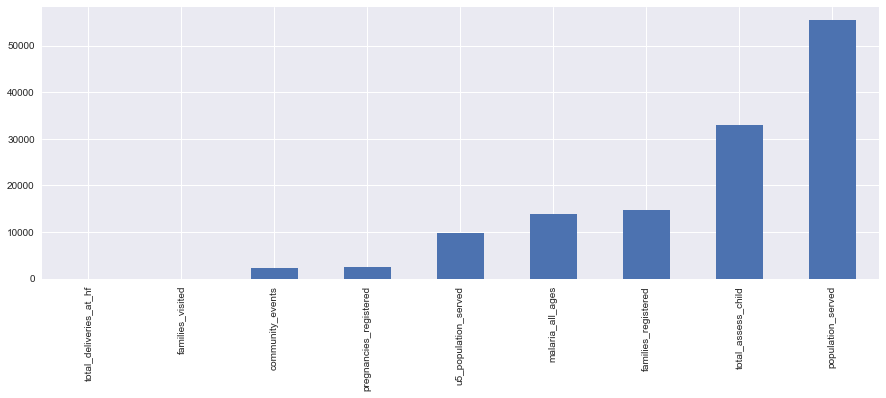

In [20]:
d,g = CHWSummaries( EOY_ke_dt, ke_argz_EPM, "Summarizing Key Variables ", plotit=True) 
d
g



2. Correlations - Amongst Key Variables


,families_registered,population_served,u5_population_served,community_events,pregnancies_registered,total_assess_child,total_deliveries_at_hf,malaria_all_ages,families_visited
families_registered,1.000,0.993,0.978,-0.094,0.716,0.193,NaN,0.098,NaN
population_served,0.993,1.000,0.978,-0.074,0.725,0.213,NaN,0.117,NaN
u5_population_served,0.978,0.978,1.000,0.046,0.829,0.373,NaN,0.249,NaN
community_events,-0.094,-0.074,0.046,1.000,0.391,0.725,NaN,0.427,NaN
pregnancies_registered,0.716,0.725,0.829,0.391,1.000,0.787,NaN,0.612,NaN
total_assess_child,0.193,0.213,0.373,0.725,0.787,1.000,NaN,0.798,NaN
total_deliveries_at_hf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
malaria_all_ages,0.098,0.117,0.249,0.427,0.612,0.798,NaN,1.000,NaN
families_visited,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


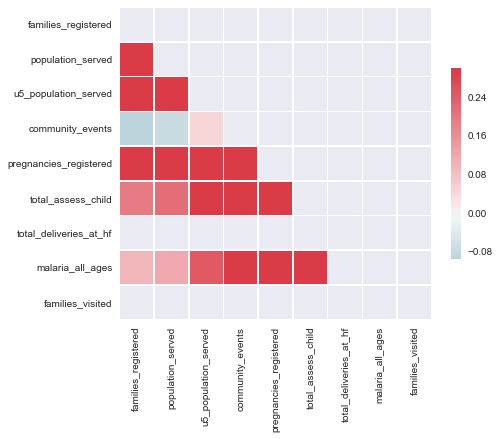

In [21]:
print("\n\n2. Correlations - Amongst Key Variables")
t,g = plotCorrz( corrz( EOY_ke_dt, ke_argz_EPM,) )
t




 2. Diseases


 i.Summarizing Diseases @ KE 2017 


,total_malaria_child,total_pneumonia_child,total_diarrhea_child,fever_cases,fast_breathing_u5,cough_two_weeks
# Cases or Sum,8186.00,2470.00,2877.0,17846.00,2145.00,57.00
Avg. per Branch,584.71,176.43,205.5,1274.71,153.21,4.07
Max per Branch,1655.00,324.00,511.0,3788.00,273.00,11.00
Min per Branch,5.00,5.00,2.0,9.00,5.00,0.00


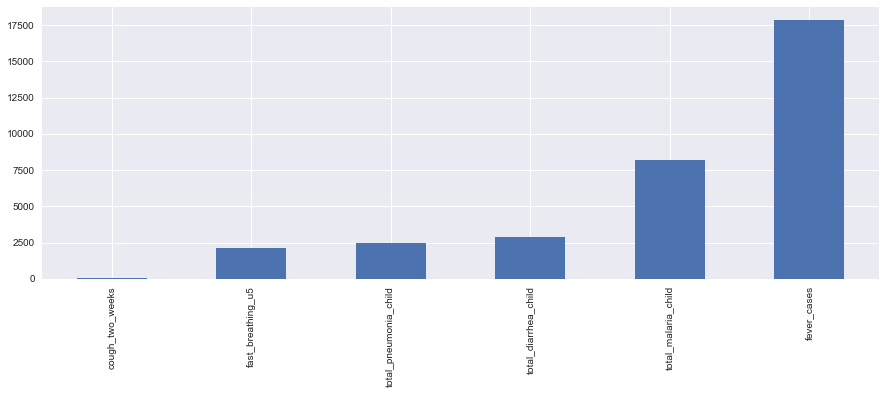

In [22]:
print("\n\n 2. Diseases")

d,g = CHWSummaries( EOY_ke_dt[ EOY_ke_dt["Year"]==2017], ke_argz_diseases+ke_argz_signs, "i.Summarizing Diseases @ KE 2017 ", plotit=True, unit="Branch") 
d
g




ii.. Correlations - Amongst Key Variables


,total_malaria_child,total_pneumonia_child,total_diarrhea_child,fever_cases,fast_breathing_u5,cough_two_weeks
total_malaria_child,1.000,0.621,0.768,0.970,0.618,0.438
total_pneumonia_child,0.621,1.000,0.862,0.676,0.999,0.807
total_diarrhea_child,0.768,0.862,1.000,0.788,0.867,0.701
fever_cases,0.970,0.676,0.788,1.000,0.675,0.550
fast_breathing_u5,0.618,0.999,0.867,0.675,1.000,0.812
cough_two_weeks,0.438,0.807,0.701,0.550,0.812,1.000


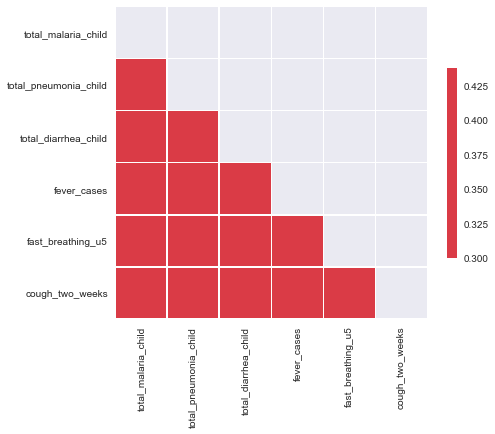

In [23]:

print("\n\nii.. Correlations - Amongst Key Variables")
t,g = plotCorrz( corrz( EOY_ke_dt, ke_argz_diseases+ke_argz_signs,) )
t




 3. Pregnancies


 i.Summarizing Diseases @ KE 2017


,pregnancies_registered,underage_pregnancies,total_deliveries_at_hf,anc_visits,on_time_pnc_visits,total_healthy_pnc_visits,all_first_fu_pnc_visits,on_time_pnc_visits_48h,mothers_counselled_on_exclusive_breastfeeding
# Cases or Sum,1341.00,107.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Avg. per Branch,95.79,7.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Max per Branch,147.00,13.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Min per Branch,10.00,4.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


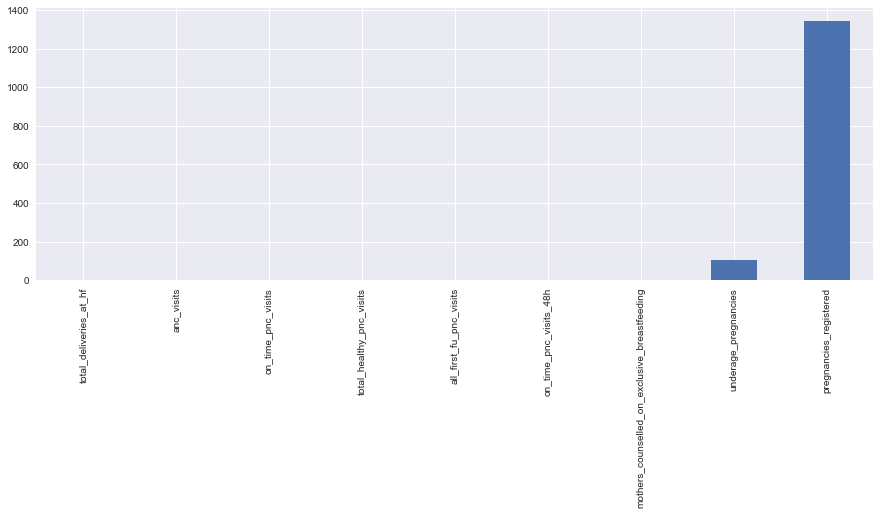

In [24]:
print("\n\n 3. Pregnancies")
d,g = CHWSummaries( EOY_ke_dt[ EOY_ke_dt["Year"]==2017], ke_argz_pregoz, "i.Summarizing Diseases @ KE 2017", plotit=True, unit="Branch") 
d
g




ii.. Correlations - Amongst Key Variables


,pregnancies_registered,underage_pregnancies,total_deliveries_at_hf,anc_visits,on_time_pnc_visits,total_healthy_pnc_visits,all_first_fu_pnc_visits,on_time_pnc_visits_48h,mothers_counselled_on_exclusive_breastfeeding,total_malaria_child,total_pneumonia_child,total_diarrhea_child,fever_cases,fast_breathing_u5,cough_two_weeks
pregnancies_registered,1.000,0.956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.651,0.717,0.811,0.704,0.718,0.750
underage_pregnancies,0.956,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.591,0.713,0.794,0.627,0.707,0.706
total_deliveries_at_hf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
anc_visits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
on_time_pnc_visits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_healthy_pnc_visits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
all_first_fu_pnc_visits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
on_time_pnc_visits_48h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mothers_counselled_on_exclusive_breastfeeding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_malaria_child,0.651,0.591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,0.621,0.768,0.970,0.618,0.438


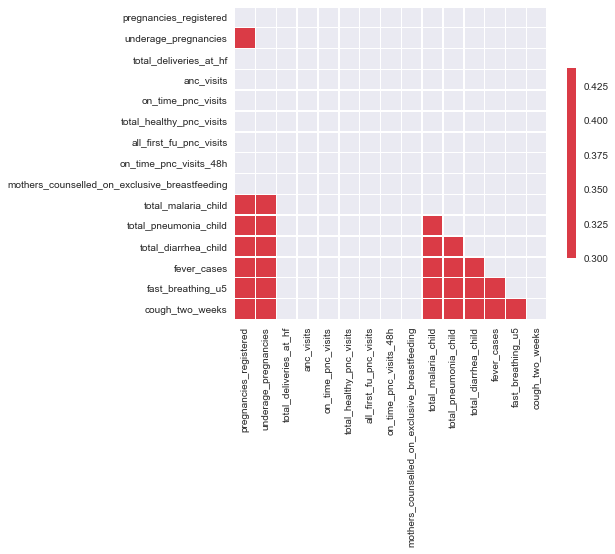

In [25]:

print("\n\nii.. Correlations - Amongst Key Variables")
t,g = plotCorrz( corrz( EOY_ke_dt, ke_argz_pregoz+ke_argz_diseases+ke_argz_signs,) )
t


# Ogembo 2015 - 2017



# Appendix

## Summary Stats for Ogembo

### By HH Quintiles

In [26]:
og_dt.groupby("Quints_Households Registered")[argz_EPM+["Households Registered"]].agg([np.mean,sum]).round(2)

Sales            Community Events       \
                                  mean        sum             mean  sum   
Quints_Households Registered                                              
Quint_1                        4991.26   74868.85             4.13   62   
Quint_2                        4665.24   65313.38             4.93   69   
Quint_3                        4678.86   70182.90             5.27   79   
Quint_4                        8063.31  104823.00             6.38   83   
Quint_5                       14009.01  210135.16            10.33  155   

                             Pregnancy     Total Assessments        \
                                  mean sum              mean   sum   
Quints_Households Registered                                         
Quint_1                           1.73  26             53.60   804   
Quint_2                           3.21  45             56.57   792   
Quint_3                           4.20  63             64.60   969   
Quint_4                           3.23  42             67.77   881   
Quint_5                           4.47  67             79.73  1196   

                             Total Referrals        All Malaria Assessments  \
                                        mean    sum                    mean   
Quints_Households Registered                                                  
Quint_1                                 0.62   9.35                   10.60   
Quint_2                                 0.57   8.05                   15.14   
Quint_3                                 0.69  10.37                   14.87   
Quint_4                                 0.59   7.72                    9.31   
Quint_5                                 0.85  12.80                   14.20   

                                  Households Registered        
                              sum                  mean   sum  
Quints_Households Registered                                   
Quint_1                       159                 69.20  1038  
Quint_2                       212                 86.71  1214  
Quint_3                       223                 99.40  1491  
Quint_4                       121                112.46  1462  
Quint_5                       213                142.60  2139



4.a. Correlations - Relative to HH Quitiles - 1).5th Quintile


,Sales,Community Events,Pregnancy,Total Assessments,Total Referrals,All Malaria Assessments
Sales,1.000,0.858,0.378,-0.011,0.284,-0.119
Community Events,0.858,1.000,0.250,0.158,0.308,-0.043
Pregnancy,0.378,0.250,1.000,0.301,0.565,0.486
Total Assessments,-0.011,0.158,0.301,1.000,0.407,0.202
Total Referrals,0.284,0.308,0.565,0.407,1.000,0.176
All Malaria Assessments,-0.119,-0.043,0.486,0.202,0.176,1.000




4.b. Correlations - Relative to HH Quitiles - 2).1st Quintile


,Sales,Community Events,Pregnancy,Total Assessments,Total Referrals,All Malaria Assessments
Sales,1.000,0.573,0.034,0.354,0.472,0.285
Community Events,0.573,1.000,-0.306,0.453,0.335,0.265
Pregnancy,0.034,-0.306,1.000,0.205,0.424,0.031
Total Assessments,0.354,0.453,0.205,1.000,0.509,0.807
Total Referrals,0.472,0.335,0.424,0.509,1.000,0.250
All Malaria Assessments,0.285,0.265,0.031,0.807,0.250,1.000


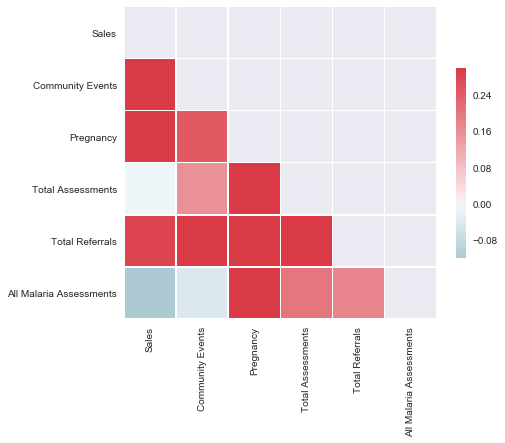

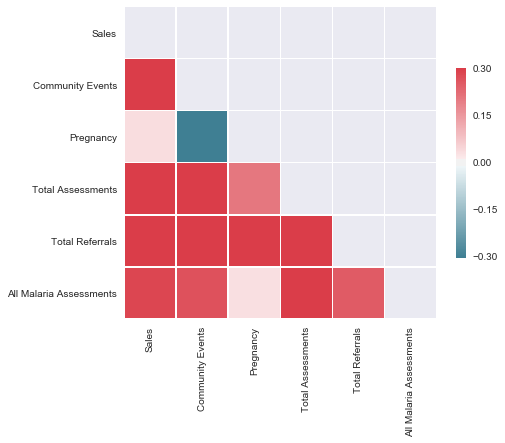

In [27]:
print("\n\n4.a. Correlations - Relative to HH Quitiles - 1).5th Quintile")
t,g = plotCorrz( corrz( og_dt[og_dt["Quints_Households Registered"]=="Quint_5"], argz_EPM) )
t

print("\n\n4.b. Correlations - Relative to HH Quitiles - 2).1st Quintile")
t,g = plotCorrz( corrz( og_dt[og_dt["Quints_Households Registered"]=="Quint_1"], argz_EPM) )
t





4.c. Correlations - Relative to HH Quitiles - 3).2nd Quintile


,Sales,Community Events,Pregnancy,Total Assessments,Total Referrals,All Malaria Assessments
Sales,1.000,0.886,0.432,0.676,0.507,-0.104
Community Events,0.886,1.000,0.563,0.651,0.498,-0.084
Pregnancy,0.432,0.563,1.000,0.669,0.255,0.126
Total Assessments,0.676,0.651,0.669,1.000,0.453,0.252
Total Referrals,0.507,0.498,0.255,0.453,1.000,-0.219
All Malaria Assessments,-0.104,-0.084,0.126,0.252,-0.219,1.000




4.d. Correlations - Relative to HH Quitiles - 4).3rd Quintile


,Sales,Community Events,Pregnancy,Total Assessments,Total Referrals,All Malaria Assessments
Sales,1.000,0.560,-0.202,0.101,-0.339,-0.280
Community Events,0.560,1.000,-0.160,0.447,-0.166,-0.157
Pregnancy,-0.202,-0.160,1.000,0.056,0.195,0.102
Total Assessments,0.101,0.447,0.056,1.000,-0.084,-0.013
Total Referrals,-0.339,-0.166,0.195,-0.084,1.000,0.347
All Malaria Assessments,-0.280,-0.157,0.102,-0.013,0.347,1.000




4.e. Correlations - Relative to HH Quitiles - 5).4th Quintile


,Sales,Community Events,Pregnancy,Total Assessments,Total Referrals,All Malaria Assessments
Sales,1.000,0.627,0.504,0.454,0.377,0.370
Community Events,0.627,1.000,0.250,0.202,0.065,-0.052
Pregnancy,0.504,0.250,1.000,0.516,0.594,0.739
Total Assessments,0.454,0.202,0.516,1.000,0.453,0.625
Total Referrals,0.377,0.065,0.594,0.453,1.000,0.323
All Malaria Assessments,0.370,-0.052,0.739,0.625,0.323,1.000


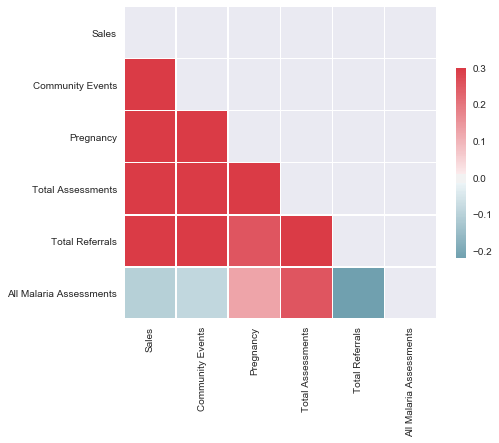

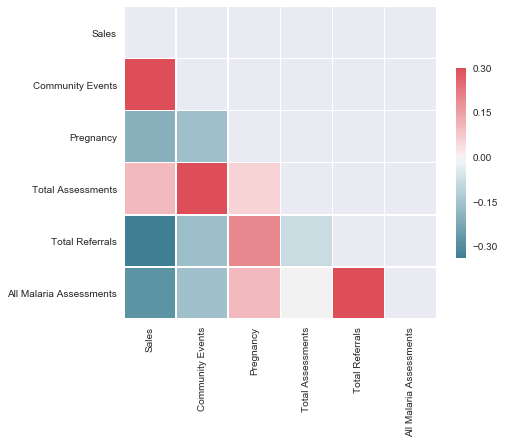

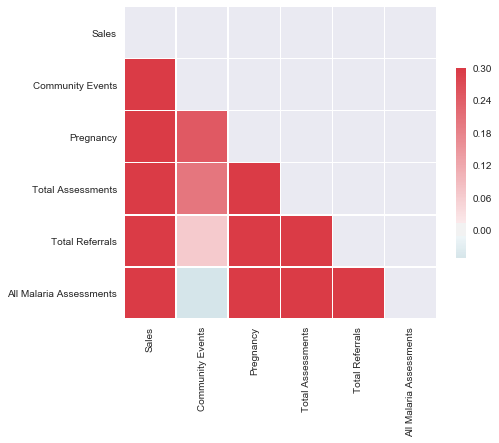

In [28]:
## Additional Correlations for Ogembo 

print("\n\n4.c. Correlations - Relative to HH Quitiles - 3).2nd Quintile")
t,g = plotCorrz( corrz( og_dt[og_dt["Quints_Households Registered"]=="Quint_2"], argz_EPM) )
t


print("\n\n4.d. Correlations - Relative to HH Quitiles - 4).3rd Quintile")
t,g = plotCorrz( corrz( og_dt[og_dt["Quints_Households Registered"]=="Quint_3"], argz_EPM) )
t

print("\n\n4.e. Correlations - Relative to HH Quitiles - 5).4th Quintile")
t,g = plotCorrz( corrz( og_dt[og_dt["Quints_Households Registered"]=="Quint_4"], argz_EPM) )
t

#### HH  